In [1]:
#Step (1): Read Data
import pandas as pd #Read data
import numpy as np  #Array

# Read in dataset (encoding = 'Big5'可顯示出繁體中文)
data_train = pd.read_excel("01train.xlsx")
data_train.head() # Show data (看看是否讀取成功)

手機螢幕溫度(平均)  手機螢幕溫度(最大)  手機背蓋溫度(平均)  平均APP運作指標/小時    充電時間指標     手機電池電量  \
0   58.785714   63.833333   43.213333    231.000000  0.039474  61.255411   
1   52.357143   57.857143   58.053333     92.090000  0.732759  91.393846   
2   30.674860   36.714286   36.661527    836.239303  0.229050  68.931202   
3   32.119048   41.571429   63.213333    588.800000  0.090909  54.455267   
4   41.214286   49.404762   52.486667    683.900000  0.072727  61.922799   

   CPU跑分階級  手機外殼/包膜指標    外型平均曲率       上網頻率指標       通話頻率指標  新機/二手/老舊    內容容量比率  \
0        3   0.053652 -0.037180  6235.000000  6029.000000         0  0.999244   
1        4   0.074205  0.155243  1750.000000  1422.000000         0  0.950294   
2        3   0.121504  0.031717  2679.476981  2200.824592         0  1.000000   
3        3   0.153716  0.009326   362.900000     0.000000         0  0.918970   
4        3   0.097287 -0.030090  2777.000000  2001.000000         0  0.906411   

   CPU效能等級  Underclocking  
0        1              0  
1        2              1  
2        1              0  
3        1              1  
4        1              0

In [2]:
data_train.describe()

手機螢幕溫度(平均)   手機螢幕溫度(最大)   手機背蓋溫度(平均)  平均APP運作指標/小時       充電時間指標  \
count  3903.000000  3903.000000  3903.000000   3903.000000  3903.000000   
mean     38.984541    45.294944    52.784871    656.507337     0.225864   
std      14.540574    15.546263    64.786127    717.237752     0.232311   
min       7.902370     8.047619     2.562656  -8000.000000     0.000000   
25%      28.642857    34.880952    43.504429    224.700000     0.030303   
50%      38.976190    47.023810    53.053333    413.100000     0.142857   
75%      50.119048    57.345238    60.650000    834.969651     0.371429   
max      75.619048    79.547619  4000.000000   4412.000000     0.966667   

            手機電池電量      CPU跑分階級    手機外殼/包膜指標       外型平均曲率       上網頻率指標  \
count  3903.000000  3903.000000  3903.000000  3903.000000  3903.000000   
mean     75.190124     3.319754     0.109481     0.015342  2553.566565   
std      14.008806     0.684632     0.090865     0.125137  1829.663990   
min      47.889610     3.000000     0.003690    -1.043000     0.675070   
25%      62.761544     3.000000     0.058475    -0.055860   948.100000   
50%      76.677489     3.000000     0.085307     0.005701  2276.000000   
75%      86.821260     3.000000     0.143723     0.078966  3839.552040   
max     100.000000     6.000000     1.776212     1.208233  8410.000000   

            通話頻率指標     新機/二手/老舊       內容容量比率      CPU效能等級  Underclocking  
count  3903.000000  3903.000000  3903.000000  3903.000000    3903.000000  
mean   2209.062206     0.297463     0.833713     1.319754       0.428132  
std    1810.428997     0.572666    12.506317     0.684632       0.494871  
min       0.000000     0.000000  -600.000000     1.000000       0.000000  
25%     579.800000     0.000000     0.802960     1.000000       0.000000  
50%    1898.000000     0.000000     0.937191     1.000000       0.000000  
75%    3455.073327     1.000000     0.987258     1.000000       1.000000  
max    8129.000000     5.000000   500.000000     4.000000       1.000000

In [3]:
# Appendix: Data preprocessing (程式供參考用)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler  #建構standardization的物件

name_list_outlier =['手機螢幕溫度(平均)','手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','上網頻率指標','通話頻率指標','內容容量比率']
name_pre_outlier = ['Mobile Screen Temperature (Max)','Mobile Phone Back Cover Temperature (Average)','Average APP Operation Index/Hour','Mobile Phone Battery Level','Content Capacity Ratio']


#離群值處理
def  outlier_del(data_frame,name_list_outlier):
    for i, name in enumerate(name_list_outlier):
        print(name)
        print("Shape Of The Before Ouliers: ", data_frame[name].shape)
    
        # 计算IQR
        Q1 = np.percentile(data_frame[name], 25)
        Q3 = np.percentile(data_frame[name], 75)
        IQR = Q3 - Q1
        n = 4

        # 定义离群值范围
        lower_bound = Q1 - n * IQR
        upper_bound = Q3 + n * IQR

        # 过滤离群值
        filtered_entries = ((data_frame[name] >= lower_bound) & (data_frame[name] <= upper_bound))
        data_frame = data_frame[filtered_entries]
    
        print("Shape Of The After Ouliers: ",data_frame[name].shape)
        print('===================================================================================================================')
    return data_frame

data_train=outlier_del(data_train,name_list_outlier)
data_train.describe()


手機螢幕溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機螢幕溫度(最大)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機背蓋溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3902,)
平均APP運作指標/小時
Shape Of The Before Ouliers:  (3902,)
Shape Of The After Ouliers:  (3830,)
上網頻率指標
Shape Of The Before Ouliers:  (3830,)
Shape Of The After Ouliers:  (3830,)
通話頻率指標
Shape Of The Before Ouliers:  (3830,)
Shape Of The After Ouliers:  (3830,)
內容容量比率
Shape Of The Before Ouliers:  (3830,)
Shape Of The After Ouliers:  (3801,)


手機螢幕溫度(平均)   手機螢幕溫度(最大)   手機背蓋溫度(平均)  平均APP運作指標/小時       充電時間指標  \
count  3801.000000  3801.000000  3801.000000   3801.000000  3801.000000   
mean     38.962214    45.324557    51.905921    604.312104     0.225005   
std      14.545865    15.534182    14.121878    569.658290     0.231510   
min       7.902370     8.047619     2.562656      2.806544     0.000000   
25%      28.547619    34.738095    43.525909    224.200000     0.029412   
50%      38.809524    46.952381    53.053333    407.263972     0.142857   
75%      50.119048    57.476190    60.700000    796.595221     0.371429   
max      75.619048    79.547619   118.066667   3265.000000     0.966667   

            手機電池電量      CPU跑分階級    手機外殼/包膜指標       外型平均曲率       上網頻率指標  \
count  3801.000000  3801.000000  3801.000000  3801.000000  3801.000000   
mean     75.167726     3.300447     0.109813     0.015688  2482.091050   
std      14.004451     0.673344     0.091590     0.125558  1759.609465   
min      47.889610     3.000000     0.003690    -1.043000     0.675070   
25%      62.770563     3.000000     0.058489    -0.055860   930.600000   
50%      76.587302     3.000000     0.085611     0.005942  2212.000000   
75%      86.544012     3.000000     0.144050     0.079059  3789.000000   
max     100.000000     6.000000     1.776212     1.208233  8410.000000   

            通話頻率指標     新機/二手/老舊       內容容量比率      CPU效能等級  Underclocking  
count  3801.000000  3801.000000  3801.000000  3801.000000    3801.000000  
mean   2136.939156     0.304920     0.864388     1.300447       0.429098  
std    1739.699641     0.578018     0.172376     0.673344       0.495012  
min       0.000000     0.000000     0.055373     1.000000       0.000000  
25%     556.000000     0.000000     0.805458     1.000000       0.000000  
50%    1843.000000     0.000000     0.937216     1.000000       0.000000  
75%    3368.072728     1.000000     0.987014     1.000000       1.000000  
max    8129.000000     5.000000     1.000000     4.000000       1.000000

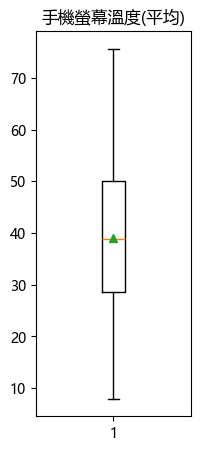

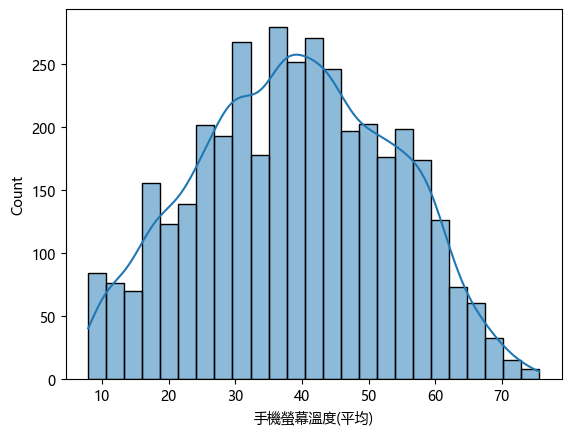

偏態(Skewness): -0.03
峰度(Kurtosis): -0.72


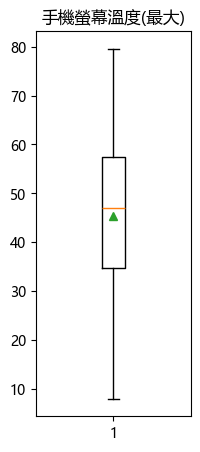

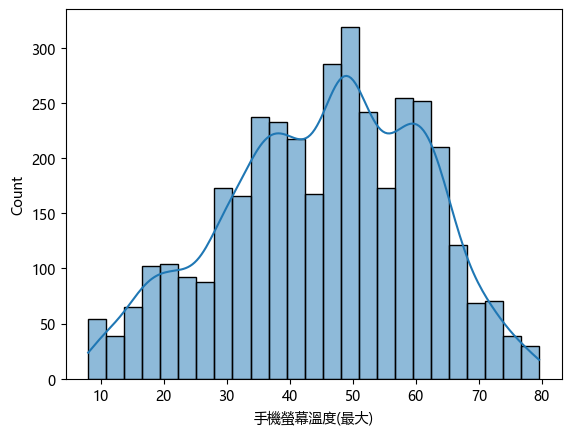

偏態(Skewness): -0.24
峰度(Kurtosis): -0.60


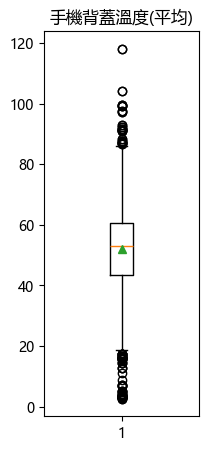

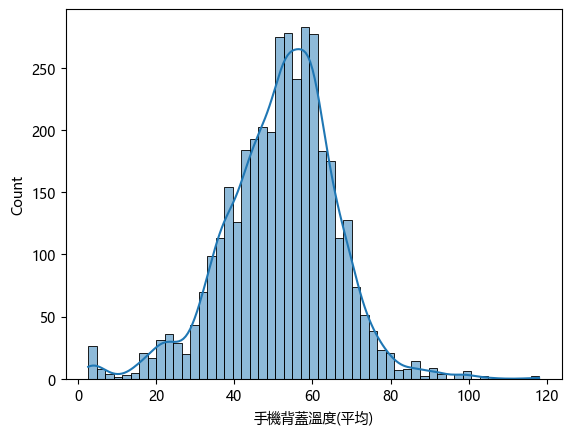

偏態(Skewness): -0.33
峰度(Kurtosis): 1.27


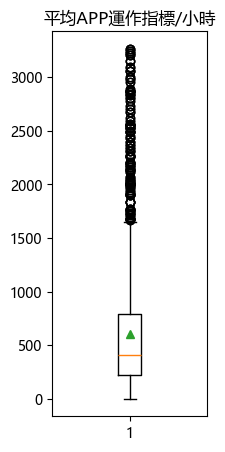

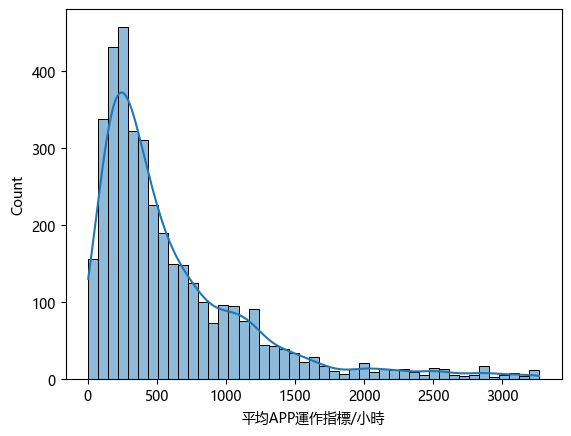

偏態(Skewness): 1.98
峰度(Kurtosis): 4.48


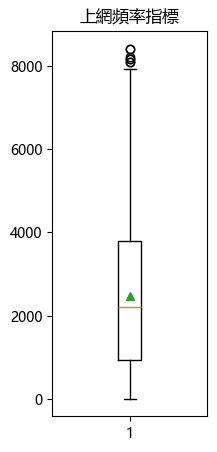

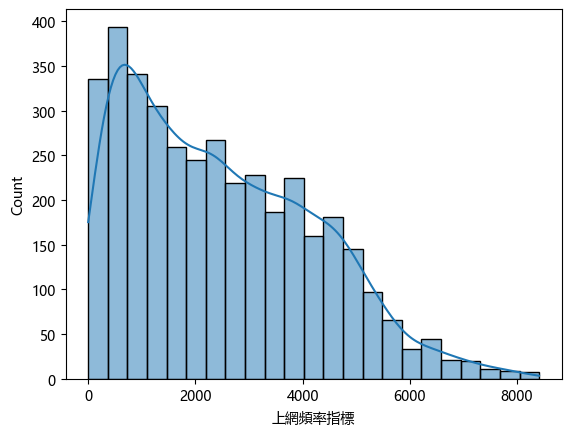

偏態(Skewness): 0.61
峰度(Kurtosis): -0.36


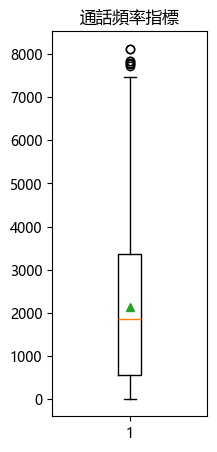

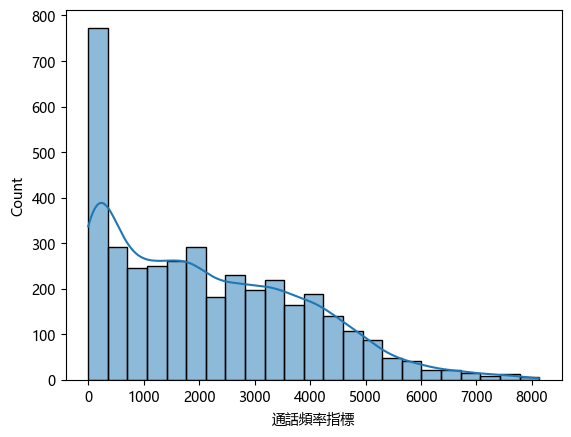

偏態(Skewness): 0.65
峰度(Kurtosis): -0.29


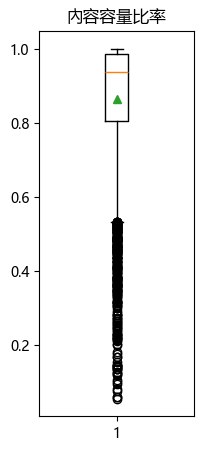

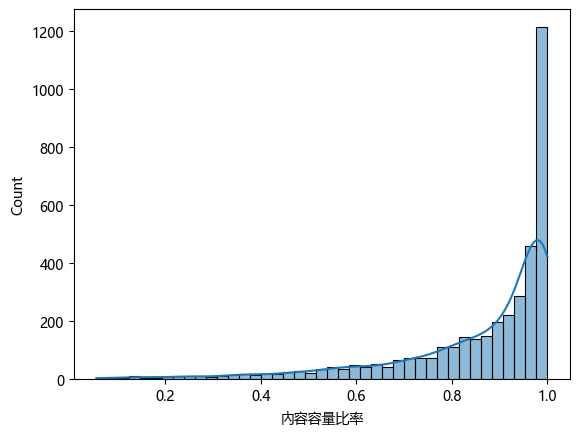

偏態(Skewness): -1.84
峰度(Kurtosis): 3.42


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑
plt.rcParams['axes.unicode_minus'] = False

def box_graph(data_frame,name_list):
    for i in range(len(name_list)):
        plt.figure(figsize=(2,5))
        plt.boxplot(data_frame[name_list[i]],showmeans=True)   
        plt.title(name_list[i])
        plt.show()
        sns.histplot(data_frame[name_list[i]], kde=True)
        plt.show()
        print("偏態(Skewness): {:.2f}".format(data_frame[name_list[i]].skew()))
        print("峰度(Kurtosis): {:.2f}".format(data_frame[name_list[i]].kurt()))
        print('==================================================================================================')
box_graph(data_train,name_list_outlier)


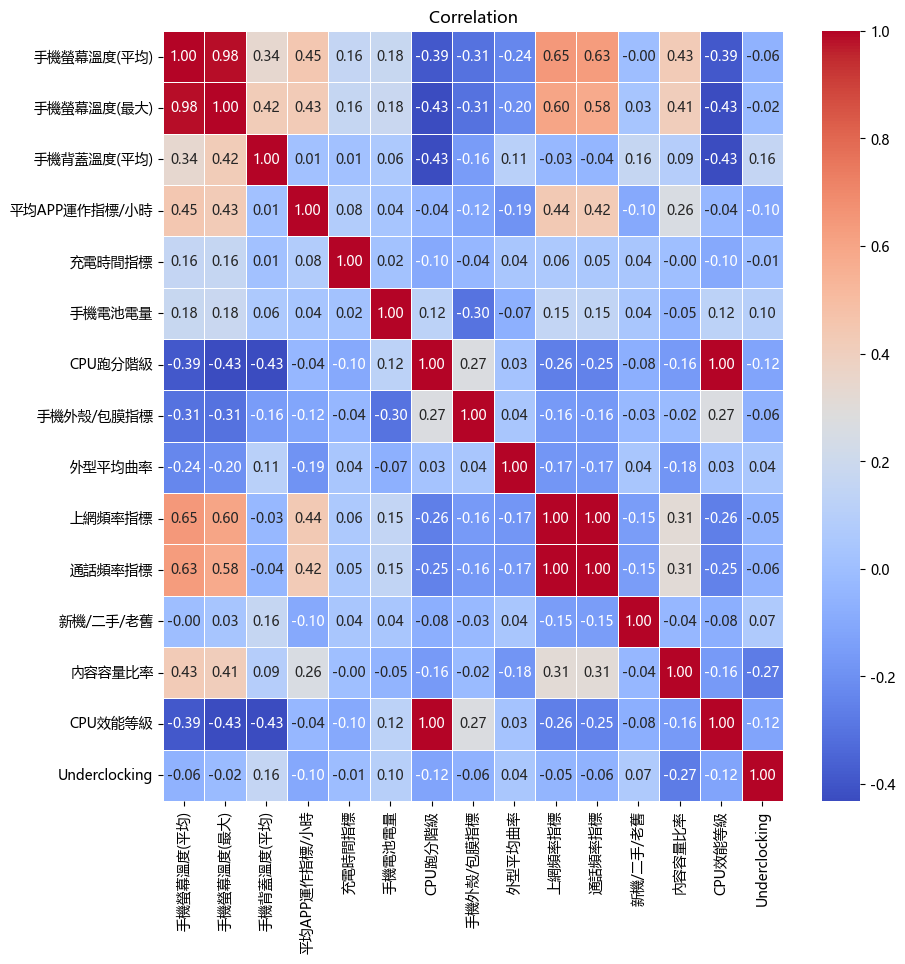

In [5]:

def corr_matrix_graph(data_frame):
    corr_matrix = data_frame.corr()
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f') #各參數代表的意思請查閱seaborn.heatmap官網的說明
    plt.title(' Correlation ')
    plt.show()
    
corr_matrix_graph(data_train)

In [6]:
#Step (3): 用X儲存features, Y為labels(Underclocking)
y_data = data_train['Underclocking'].to_numpy()
feature_ex =['手機螢幕溫度(平均)','手機背蓋溫度(平均)','充電時間指標','手機電池電量','手機外殼/包膜指標','新機/二手/老舊','內容容量比率']	
x_data = data_train[feature_ex].to_numpy()


#正規化
def data_normalized(data):
    min_max_scaler = MinMaxScaler()
    data_normalized = min_max_scaler.fit_transform(data)
    return data_normalized
def data_standardized(data):
    standard_scaler = StandardScaler()
    data_standardized = standard_scaler.fit_transform(data)
    return data_standardized 
x_data=data_normalized(x_data)
x_data=data_standardized(x_data)
print(x_data) 
print(y_data) 

[[ 1.36300652 -0.61562149 -0.80150167 ... -0.61325478 -0.52759587
   0.78243834]
 [ 0.92099655  0.43536847  2.19351346 ... -0.3888291  -0.52759587
   0.49842579]
 [-0.56981449 -1.07962976  0.01747584 ...  0.12766524 -0.52759587
   0.78682338]
 ...
 [-1.36665061 -0.72751934  0.16482193 ...  0.92255241  1.20268187
   0.1461305 ]
 [ 0.10900786  0.42781419  0.39875095 ... -0.33643297 -0.52759587
  -0.78380936]
 [ 1.30898308  0.16152563 -0.86666265 ... -0.84277297 -0.52759587
   0.32371546]]
[0 1 0 ... 0 0 0]


In [7]:
#Step (4): 把dataset分成訓練跟驗證
from sklearn.model_selection import train_test_split
#test_size=0.3 為比例-> training:test=7:3
trainX, testX, trainY, testY = train_test_split(x_data, y_data, test_size=0.15, random_state=42)

In [8]:
from xgboost import XGBClassifier
import numpy as np 
# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=10000, 
                             learning_rate= 0.01,
                             max_depth=3,
                             gamma=5)
# 使用訓練資料訓練模型
xgboostModel.fit(trainX, trainY)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(testX)
print('訓練集: ',xgboostModel.score(trainX,trainY))
print('測試集: ',xgboostModel.score(testX,testY))

訓練集:  0.714860681114551
測試集:  0.6935201401050788


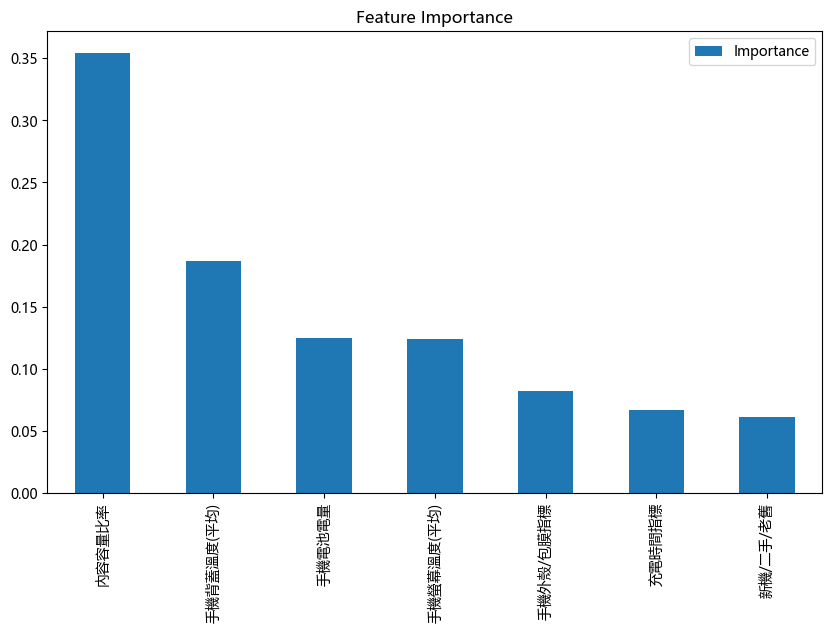

In [9]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑
plt.rcParams['axes.unicode_minus'] = False
importances = xgboostModel.feature_importances_
features = feature_ex
importance_df = pd.DataFrame(importances, index=features, columns=['Importance']).sort_values('Importance', ascending=False)
importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

In [10]:


# 读取测试数据
data_test = pd.read_excel("01test.xlsx")
test_id = data_test.pop('id')  
data_test=data_test[feature_ex]
# 假设 data_normalized 和 data_standardized 已正确定义
data_test = data_normalized(data_test)
data_test = data_standardized(data_test)

# 使用xgboost模型进行预测
predicted_ans = xgboostModel.predict(data_test)  # 确保这里使用的是正确处理后的测试数据

# 创建提交DataFrame
my_submission = pd.DataFrame({'id': test_id, 'Underclocking': predicted_ans})
my_submission.to_csv('submission.csv', index=False)


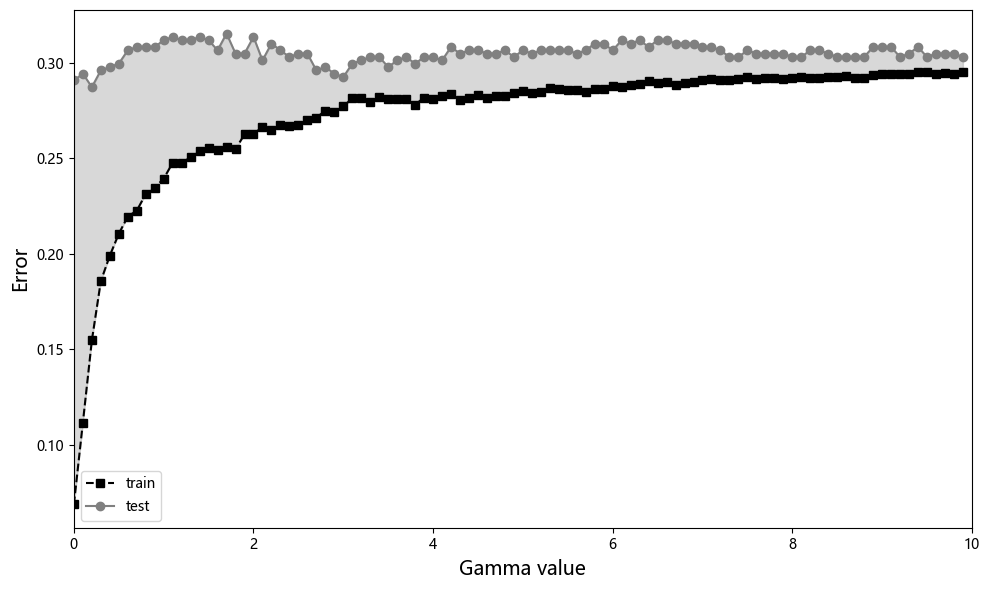

In [11]:


def xgboostModel_fun(n=10000, lr=0.01, maxdepth=3, g=10):
    xgboostModel = XGBClassifier(n_estimators=n, 
                                 learning_rate=lr,
                                 max_depth=maxdepth,
                                 gamma=g)
    return xgboostModel

otrn = []
otst = []
change = 10
divisors = np.arange(0, change, 0.1)  # 这样 divisors 就与 otrn 和 otst 长度一致

for g in divisors:
    tree = xgboostModel_fun(g=g) 
    tree.fit(trainX, trainY) 
    otrn.append(1 - tree.score(trainX, trainY)) 
    otst.append(1 - tree.score(testX, testY))

fig, ax = plt.subplots()
fig.set_size_inches((10, 6))
_=ax.plot(divisors, otrn, '--s', label='train', color='k')
_=ax.plot(divisors, otst, '-o', label='test', color='gray')
_=ax.fill_between(divisors, otrn, otst, color='gray', alpha=.3)
_=ax.legend(loc=0)
_=ax.set_xlabel('Gamma value', fontsize=14)  # 更正 x 轴标签
_=ax.set_ylabel('Error', fontsize=14)
_=ax.axis(xmin=0, xmax=change)  # xmax 为 change
fig.tight_layout()


In [17]:

import itertools
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import numpy as np

# 假设 x_data 和 y_data 已经定义
all_features = ['手機螢幕溫度(平均)','手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','充電時間指標',
                '手機電池電量','CPU跑分階級','手機外殼/包膜指標','外型平均曲率','上網頻率指標',
                '通話頻率指標','新機/二手/老舊','內容容量比率','CPU效能等級']

# 初始化变量来存储最佳分数和最佳特征组合
best_score = 0
best_combination = []

# 遍历所有特征组合的可能性，从至少选择1个特征开始
for k in range(1, len(all_features) + 1):
    for combination in itertools.combinations(all_features, k):
        # 提取当前组合的特征
        temp_x_data = data_train[list(combination)].to_numpy()
        
        # 数据标准化和归一化可以根据需要在此处应用
        temp_x_data = data_normalized(temp_x_data)
        temp_x_data = data_standardized(temp_x_data)
        
        # 使用交叉验证评估当前特征组合的性能
        model = XGBClassifier(n_estimators=10000, learning_rate=0.01, max_depth=3, gamma=5,random_state=42)
        scores = cross_val_score(model, temp_x_data, y_data, cv=5)  # 5折交叉验证
        
        # 计算平均分数
        mean_score = np.mean(scores)
        
        # 更新最佳分数和组合
        if mean_score > best_score:
            best_score = mean_score
            best_combination = combination
            
        print("Testing combination:", combination, "Score:", mean_score)

# 输出最佳组合和其分数
print("Best score:", best_score)
print("Best combination:", best_combination)


Testing combination: ('手機螢幕溫度(平均)',) Score: 0.5695867625700256
Testing combination: ('手機螢幕溫度(最大)',) Score: 0.5706393941489729
Testing combination: ('手機背蓋溫度(平均)',) Score: 0.592739124420776
Testing combination: ('平均APP運作指標/小時',) Score: 0.5709025520437098
Testing combination: ('充電時間指標',) Score: 0.5709025520437098
Testing combination: ('手機電池電量',) Score: 0.5982647485994883
Testing combination: ('CPU跑分階級',) Score: 0.5709025520437098
Testing combination: ('手機外殼/包膜指標',) Score: 0.5709025520437098
Testing combination: ('外型平均曲率',) Score: 0.5709025520437098
Testing combination: ('上網頻率指標',) Score: 0.5709025520437098
Testing combination: ('通話頻率指標',) Score: 0.5709025520437098
Testing combination: ('新機/二手/老舊',) Score: 0.5709025520437098
Testing combination: ('內容容量比率',) Score: 0.639044885538419
Testing combination: ('CPU效能等級',) Score: 0.5709025520437098
Testing combination: ('手機螢幕溫度(平均)', '手機螢幕溫度(最大)') Score: 0.5830022823155128
Testing combination: ('手機螢幕溫度(平均)', '手機背蓋溫度(平均)') Score: 0.6061563731931668